<a href="https://colab.research.google.com/github/cardstud/DS-Unit-2-Applied-Modeling/blob/master/module1/LS_DS_231_assignment.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Introduction**

LOGISTIC REGRESSION - HEART DISEASE PREDICTION

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression Data Preparation

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic: 
- Sex: male or female(Nominal) 
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral 
- Education
- Current Smoker: whether or not the patient is a current smoker (Nominal) 
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history) 
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal) 
- Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)
- Tot Chol: total cholesterol level (Continuous) 
- Sys BP: systolic blood pressure (Continuous) 
- Dia BP: diastolic blood pressure (Continuous) 
- BMI: Body Mass Index (Continuous) 
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 
- Glucose: glucose level (Continuous) 
- Predict variable (desired target) 
 - 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) 



#### Columns


*   male
*   age
*   education
*   currentSmoker
*   cigsPerDay
*   BPMeds
*   prevalentStroke
*   prevalentHyp
*   diabetes
*   totChol
*   sysBP
*   diaBP
*   BMI
*   heartRate
*   glucose
*   TenYearCHD



### Load in the data and place in DataFrame called hd

In [0]:
from google.colab import files
uploaded = files.upload()

Saving framingham.csv to framingham.csv


In [0]:
# Install needed packages
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*
!pip install plotly==4.*
!pip install eli5
!pip install pdpbox

# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 102kB 3.6MB/s 
     |████████████████████████████████| 133kB 4.9MB/s 
     |████████████████████████████████| 614kB 40.3MB/s 
     |████████████████████████████████| 235kB 52.0MB/s 
     |████████████████████████████████| 307kB 54.0MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 215kB 64.3MB/s 
     |████████████████████████████████| 737kB 41.1MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=2abba93b4eacfeaa6f196f38ca4d1cd20a009d178483b2b177579a28da7c8403
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=89132cb09141f0331a861fb427d9211f889e7d175cdcccf1a58b2f4d20296e3c
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d

In [0]:
# Ignore this warning: https://github.com/dmlc/xgboost/issues/4300
# xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')

In [0]:
hd = pd.read_csv('framingham.csv', header=0)

### Choose Target 

In [0]:
hd['TenYearCHD'].describe()

count    4238.000000
mean        0.151958
std         0.359023
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TenYearCHD, dtype: float64

In [0]:
# Check to see how many classes
hd['TenYearCHD'].nunique()

2

In [0]:
# Are the classes balanced; no
hd['TenYearCHD'].value_counts(normalize=True)

0    0.848042
1    0.151958
Name: TenYearCHD, dtype: float64

In [0]:
# This is the majority class 
hd['TenYearCHD'].value_counts(normalize=True).max()

0.8480415290231241

The majority class is 0 or No and occurs with 85% frequency. This falls outside frequency of >50% and < 70% so using accuracy will be misleading. Need to use another metric in addition to accuracy or instead of accuracy.

### Choose which Observations you will use to train, validate and test model
Look for any outliers to see if will include or not

In [0]:
print(hd.shape)
hd.head()

(4238, 16)


male  age  education  currentSmoker  ...    BMI  heartRate  glucose  TenYearCHD
0     1   39        4.0              0  ...  26.97       80.0     77.0           0
1     0   46        2.0              0  ...  28.73       95.0     76.0           0
2     1   48        1.0              1  ...  25.34       75.0     70.0           0
3     0   61        3.0              1  ...  28.58       65.0    103.0           1
4     0   46        3.0              1  ...  23.10       85.0     85.0           0

[5 rows x 16 columns]

In [0]:
hd.describe()

male          age  ...      glucose   TenYearCHD
count  4238.000000  4238.000000  ...  3850.000000  4238.000000
mean      0.429212    49.584946  ...    81.966753     0.151958
std       0.495022     8.572160  ...    23.959998     0.359023
min       0.000000    32.000000  ...    40.000000     0.000000
25%       0.000000    42.000000  ...    71.000000     0.000000
50%       0.000000    49.000000  ...    78.000000     0.000000
75%       1.000000    56.000000  ...    87.000000     0.000000
max       1.000000    70.000000  ...   394.000000     1.000000

[8 rows x 16 columns]

In [0]:
hd.count()

male               4238
age                4238
education          4133
currentSmoker      4238
cigsPerDay         4209
BPMeds             4185
prevalentStroke    4238
prevalentHyp       4238
diabetes           4238
totChol            4188
sysBP              4238
diaBP              4238
BMI                4219
heartRate          4237
glucose            3850
TenYearCHD         4238
dtype: int64

In [0]:
# Profile report
import pandas_profiling
hd.profile_report()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


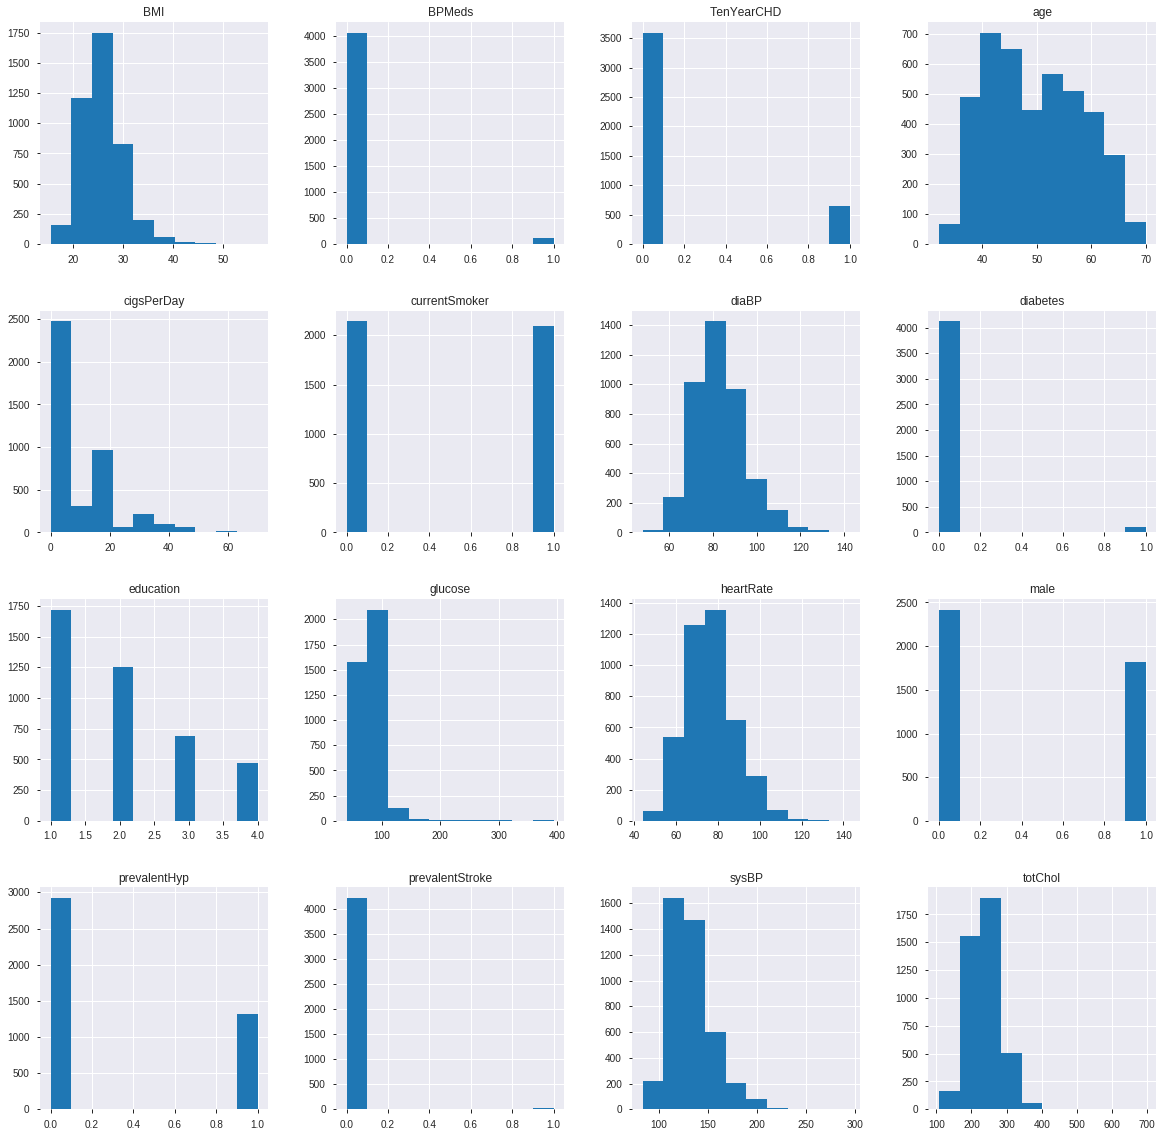

In [0]:
# Check distribution of each features's observations with Histogram
fig=plt.figure(figsize=(20,20))
ax=fig.gca()
hd.hist(ax=ax);

In [0]:
# Check with Density and Boxplot for outliers

def dense_box(feature):
  i = feature
  
  plt.figure(figsize=(5,3))
  plt.subplot(211)
  plt.xlim(hd[i].min(), hd[i].max()*1.1)
  
  ax = hd[i].plot(kind='kde')
  plt.subplot(212)
  plt.xlim(hd[i].min(), hd[i].max()*1.1)
  sns.boxplot(x=hd[i]);

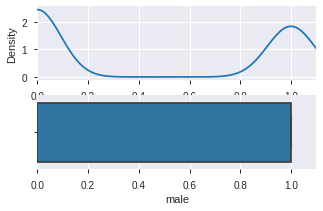

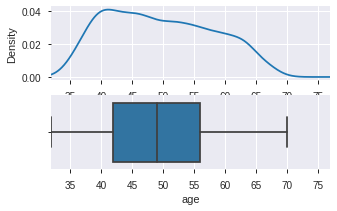

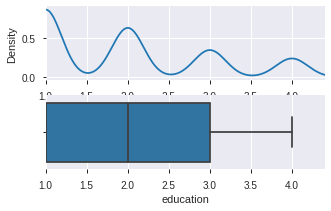

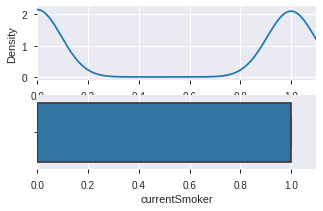

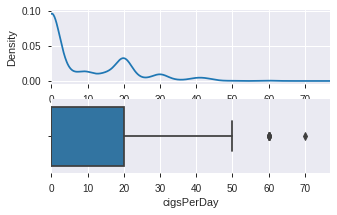

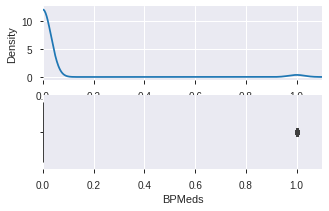

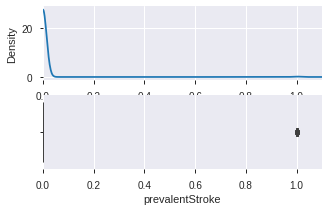

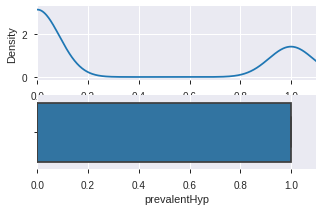

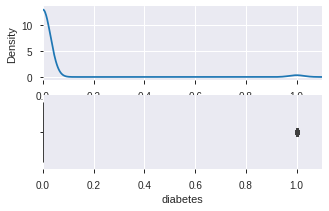

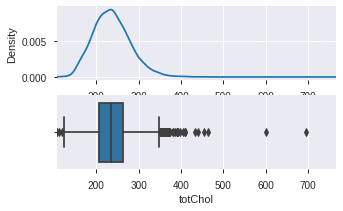

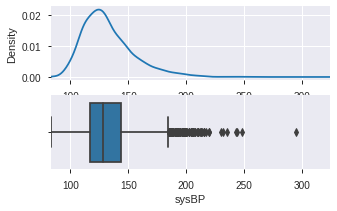

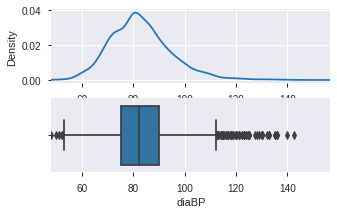

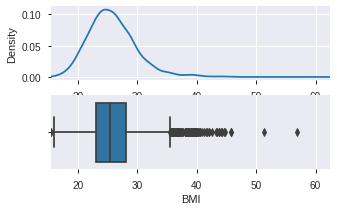

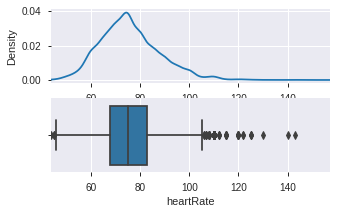

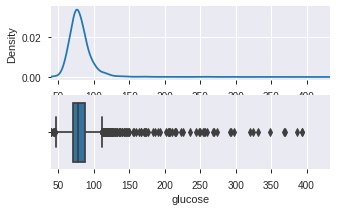

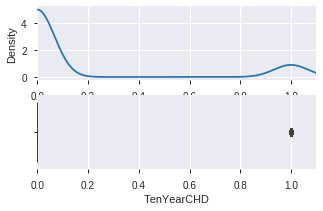

In [0]:
# Check each feature's observations for outliers
for x in hd:
  dense_box(x)

In [0]:
# Identify and remove outliers that I feel will disrupt the data
def rem_out(feature):
  q1, q3= np.percentile(hd[feature],[25,75])
  print(f'q1 = {q1}') 
  print(f'q3 = {q3}')
  
  iqr = q3 - q1
  print(f'iqr = {iqr}')
  
  lower_bound = q1 -(1.5 * iqr) 
  upper_bound = q3 +(1.5 * iqr) 
  print(f'lower_bound ={lower_bound}')
  print(f'upper_bound ={upper_bound}')

In [0]:
rem_out('cigsPerDay')

q1 = nan
q3 = nan
iqr = nan
lower_bound =nan
upper_bound =nan


In [0]:
# Remove outliers - not done yet
hd = hd[(hd['BMI'] >=5) & (hd['BMI']<=35) &
        (hd['cigsPerDay'] <30)]

### Split datasets into Train, Validation and Test sets

In [0]:
from sklearn.model_selection import train_test_split
# Split into Train and Test sets
train, test = train_test_split(hd, train_size=.80, test_size=0.20,
                               stratify=hd['TenYearCHD'], random_state=42)
train.shape,  test.shape

((2945, 16), (737, 16))

In [0]:
# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['TenYearCHD'], random_state=42)

train.shape, val.shape, test.shape

((2356, 16), (589, 16), (737, 16))

### Begin with baselines for classification

In [0]:
# Determine majority class
# This is the accuracy score of the baseline as well
target = 'TenYearCHD'
y_train = train[target]
y_train.value_counts(normalize=True)

0    0.856537
1    0.143463
Name: TenYearCHD, dtype: float64

In [0]:
majority_class = y_train.mode()[0]
y_pred = [majority_class]*len(y_train)
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [0]:
# Training accuracy of majority class baseline = frequency of majority class
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.8565365025466893

In [0]:
y_val = val[target]
y_pred = [majority_class]*len(y_val)
accuracy_score(y_val, y_pred)

0.8573853989813243

### Clean and Explore Data

In [0]:
print(hd.shape)
hd.head()

(3682, 16)


male  age  education  currentSmoker  ...    BMI  heartRate  glucose  TenYearCHD
0     1   39        4.0              0  ...  26.97       80.0     77.0           0
1     0   46        2.0              0  ...  28.73       95.0     76.0           0
2     1   48        1.0              1  ...  25.34       75.0     70.0           0
4     0   46        3.0              1  ...  23.10       85.0     85.0           0
5     0   43        2.0              0  ...  30.30       77.0     99.0           0

[5 rows x 16 columns]

In [0]:
hd.describe()

male          age  ...      glucose   TenYearCHD
count  3682.000000  3682.000000  ...  3350.000000  3682.000000
mean      0.396252    49.738186  ...    81.941194     0.143129
std       0.489184     8.617023  ...    23.395731     0.350252
min       0.000000    32.000000  ...    43.000000     0.000000
25%       0.000000    42.000000  ...    72.000000     0.000000
50%       0.000000    49.000000  ...    78.000000     0.000000
75%       1.000000    57.000000  ...    87.000000     0.000000
max       1.000000    70.000000  ...   394.000000     1.000000

[8 rows x 16 columns]

In [0]:
hd.isnull().sum()

male                 0
age                  0
education           93
currentSmoker        0
cigsPerDay           0
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             40
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose            332
TenYearCHD           0
dtype: int64

### Feature Engineering and Selection

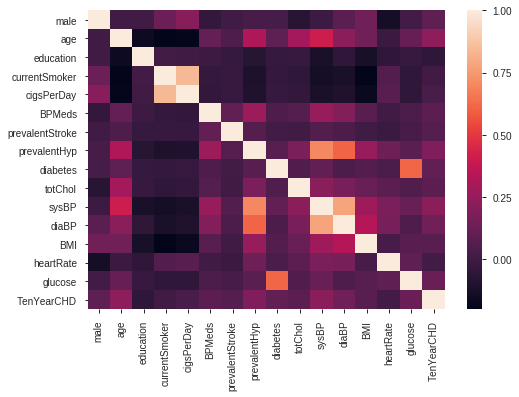

In [0]:
hd_corr = hd.corr()
sns.heatmap(hd_corr);

In [0]:
# More females than males; Change this column name to Sex to avoid the idea of a bias towards males
hd['male'].value_counts()

0    2223
1    1459
Name: male, dtype: int64

In [0]:
hd['age'].value_counts().sort_index()

32      1
33      5
34     17
35     38
36     75
37     74
38    130
39    142
40    155
41    145
42    153
43    132
44    141
45    144
46    158
47    119
48    153
49    114
50    115
51    129
52    137
53    117
54    113
55    133
56    112
57    101
58    102
59    105
60    104
61     98
62     86
63     98
64     82
65     54
66     35
67     39
68     18
69      7
70      1
Name: age, dtype: int64

In [0]:
hd['age'].unique()

array([39, 46, 48, 43, 63, 45, 52, 50, 41, 38, 47, 60, 35, 61, 59, 54, 56,
       42, 36, 53, 49, 65, 51, 62, 44, 40, 67, 57, 37, 66, 64, 55, 58, 34,
       68, 33, 32, 69, 70])

In [0]:
hd['education'].value_counts()

1.0    1466
2.0    1097
3.0     621
4.0     405
Name: education, dtype: int64

In [0]:
hd['currentSmoker'].value_counts()

0    2052
1    1630
Name: currentSmoker, dtype: int64

In [0]:
hd['cigsPerDay'].value_counts().sort_index()  # would rather see a column called: Years smoking

0.0     2052
1.0       61
2.0       18
3.0       95
4.0        9
5.0      120
6.0       18
7.0       12
8.0       11
9.0      129
10.0     139
11.0       5
12.0       3
13.0       3
14.0       2
15.0     208
16.0       3
17.0       7
18.0       8
19.0       2
20.0     717
23.0       6
25.0      53
29.0       1
Name: cigsPerDay, dtype: int64

In [0]:
hd['cigsPerDay'].unique()

array([ 0., 20., 23., 15.,  9., 10.,  5.,  1.,  3.,  2., 12.,  4., 18.,
       25., 14.,  8., 13., 11.,  7.,  6., 29., 17., 16., 19.])

In [0]:
hd['BPMeds'].value_counts()  # about 3% are on meds, probably drop this column

0.0    3535
1.0     103
Name: BPMeds, dtype: int64

In [0]:
hd['prevalentStroke'].value_counts() # about 2% are on meds, probably drop this column

0    3661
1      21
Name: prevalentStroke, dtype: int64

In [0]:
hd['prevalentHyp'].value_counts()   # interesting that a third has Hypertension but only 3% are on BP meds- 

0    2592
1    1090
Name: prevalentHyp, dtype: int64

In [0]:
hd['diabetes'].value_counts()  # about 2.5% have diabetes, probably drop this column

0    3590
1      92
Name: diabetes, dtype: int64

In [0]:
hd['totChol'].value_counts()  # Change this to above a certain number > healthy limit etc

240.0    65
220.0    65
210.0    54
232.0    54
260.0    53
         ..
347.0     1
353.0     1
360.0     1
337.0     1
392.0     1
Name: totChol, Length: 242, dtype: int64

In [0]:
hd['sysBP'].value_counts() # maybe categorize as low, normal, and high

120.0    95
130.0    90
110.0    84
115.0    81
125.0    80
         ..
192.0     1
232.0     1
92.0      1
244.0     1
202.5     1
Name: sysBP, Length: 228, dtype: int64

In [0]:
hd['diaBP'].value_counts() # maybe categorize as low, normal and high

80.0     235
82.0     128
70.0     121
81.0     119
84.0     113
        ... 
53.0       1
50.0       1
128.0      1
48.0       1
116.0      1
Name: diaBP, Length: 142, dtype: int64

In [0]:
hd['BMI'].value_counts()   # Check with age to see if can make new column; too bad no height and weight

22.91    18
22.19    17
22.54    17
23.48    17
23.09    15
         ..
18.14     1
28.07     1
24.84     1
31.05     1
19.28     1
Name: BMI, Length: 1208, dtype: int64

In [0]:
hd['heartRate'].value_counts()  # Good candidate from low, normal and high

75.0     497
80.0     338
70.0     262
60.0     207
85.0     199
        ... 
47.0       1
140.0      1
51.0       1
44.0       1
143.0      1
Name: heartRate, Length: 73, dtype: int64

In [0]:
hd['glucose'].value_counts()  # If Diabetes accounts for about 2.5% not sure why Glucose level matters here, or maybe use as low, normal, high but issue is glucose fluctuates

75.0     171
77.0     152
73.0     139
83.0     135
80.0     135
        ... 
235.0      1
386.0      1
202.0      1
191.0      1
348.0      1
Name: glucose, Length: 133, dtype: int64

In [0]:
hd['glucose'].unique()

array([ 77.,  76.,  70.,  85.,  99.,  78.,  79.,  61.,  64.,  84.,  nan,
        72.,  89.,  65., 113.,  75.,  66.,  83.,  74.,  88.,  87.,  90.,
        80., 100., 215.,  98.,  62.,  95.,  94.,  55.,  82.,  93.,  73.,
        45., 202., 103.,  68.,  97., 104.,  96., 126., 120., 105.,  71.,
        56.,  60., 117., 102.,  58.,  92.,  86., 107.,  54.,  67.,  69.,
        57.,  63.,  91., 132.,  59.,  81., 115., 140., 112., 118., 160.,
       110., 123., 108., 145., 122., 137., 106., 127., 205., 114., 101.,
        47.,  53., 163., 144., 116., 121., 172., 124., 111., 186., 223.,
        44., 156., 268.,  50., 274., 292., 255., 136., 206., 131., 148.,
        43., 173.,  48., 386., 155., 150., 147.,  52., 320., 109., 170.,
       254., 394., 270., 244., 130., 183., 119., 167., 135., 207., 177.,
       250., 294., 166., 125., 332., 348., 248., 370., 193., 191., 256.,
       235., 210.])

### Seperate X&Y/encode/impute/scale/fit model

In [0]:
### Nonpipeline way
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

target = ['TenYearCHD']
features = ['BMI', 'cigsPerDay', 'diaBP', 
            'glucose', 'heartRate', 'sysBP',
            'age', 'totChol', 'male', 'education', 
            'currentSmoker', 'prevalentStroke', 
            'prevalentHyp', 'diabetes', 'BPMeds']

X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target] 

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)
X_test_imputed = imputer.transform(X_test_encoded)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print('Validation Accuracy', model.score(X_val_scaled, y_val))
print('Test Accuracy', model.score(X_test_scaled, y_test))

Validation Accuracy 0.865874363327674
Test Accuracy 0.8683853459972863


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


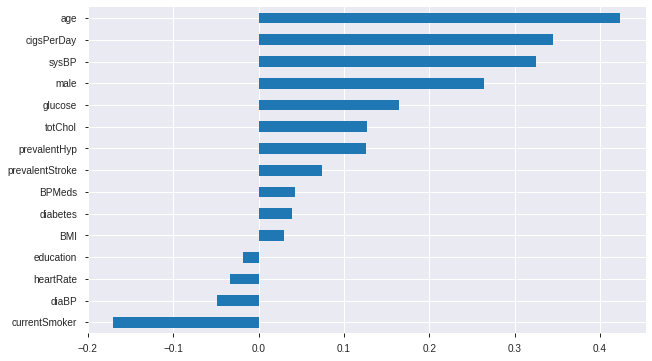

In [0]:
%matplotlib inline
fig=plt.figure(figsize=(10,6))
coefficients = pd.Series(model.coef_[0], X_train.columns)
coefficients.sort_values().plot.barh();

### Metrics to use

In [0]:
model.predict(X_val_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [0]:
model.coef_

array([[ 0.03008999,  0.34528579, -0.0487519 ,  0.16403321, -0.0335258 ,
         0.32467546,  0.42389696,  0.12716185,  0.26453045, -0.01881468,
        -0.17052916,  0.07470419,  0.12563636,  0.03860997,  0.0426035 ]])

In [0]:
model.intercept_

array([-2.02222399])

In [0]:
# BMI=24, cigsPerDay=5, diaBP=80, glucose=80, heartRate=100, sysBP=120,
#        age = 55, totChol=273, male=1, education=4, currentSmoker=1,
#        prevalentStroke=0, prevalentHyp=1, diabetes=0, BPMeds=0
test_case = [[24,5,80, 80, 100, 120, 55, 273,1, 4, 1,0,1,0,0]]
model.predict(test_case)

array([1])

In [0]:
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients.sort_values()

currentSmoker     -0.170529
diaBP             -0.048752
heartRate         -0.033526
education         -0.018815
BMI                0.030090
diabetes           0.038610
BPMeds             0.042603
prevalentStroke    0.074704
prevalentHyp       0.125636
totChol            0.127162
glucose            0.164033
male               0.264530
sysBP              0.324675
cigsPerDay         0.345286
age                0.423897
dtype: float64

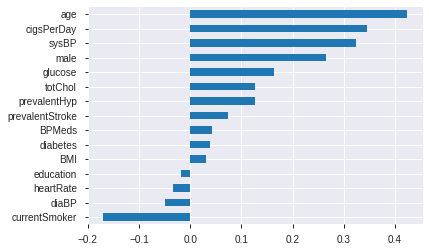

In [0]:
# Plot it
%matplotlib inline
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients.sort_values().plot.barh();

### Permutation Importances

In [0]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)
permuter.fit(X_val_scaled, y_val)

Using TensorFlow backend.


PermutationImportance(cv='prefit',
                      estimator=LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='warn',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=42,
                                                   solver='warn', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                      n_iter=5, random_state=42, refit=True,
                      scoring='accuracy')

In [0]:
permuter.feature_importances_

array([0.00067912, 0.00950764, 0.0040747 , 0.00237691, 0.00033956,
       0.00611205, 0.00814941, 0.00509338, 0.0098472 , 0.00067912,
       0.00509338, 0.00067912, 0.00305603, 0.00067912, 0.00033956])

In [0]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_val.columns.tolist()
)

### Removing features based on importances

In [0]:
print('Shape before removing features:', X_train.shape)

Shape before removing features: (2356, 15)


In [0]:
minimum_importance = 0
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train = X_train[features]

In [0]:
print('Shape after removing features:', X_train.shape)

Shape after removing features: (2356, 15)


In [0]:
# refit model
X_val = X_val[features]
X_test = X_test[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),    # do i use OneHotEncoder or OrdinalEncoder here? OneHotEncoder(use_cat_names=True)
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression(random_state=42)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test_scaled)

print ('Validation Accuracy', pipeline.score(X_val,y_val))
print('Test Accuracy', pipeline.score(X_test, y_test))

NameError: ignored

### XGBoost

In [0]:
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(n_estimators=100, random_state=42,n_jobs=-1)
)

pipeline.fit(X_train, y_train)

NameError: ignored

In [0]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

NameError: ignored

In [0]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

gb = XGBClassifier(
    n_estimators=1000,
    max_depth=7,
    learning_rate=0.2,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train),
            (X_val_encoded, y_val)]

gb.fit(X_train_encoded, y_train,
          eval_set=eval_set,
          early_stopping_rounds=50)

[0]	validation_0-error:0.121392	validation_1-error:0.151104
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.117148	validation_1-error:0.156197
[2]	validation_0-error:0.117997	validation_1-error:0.152801
[3]	validation_0-error:0.11927	validation_1-error:0.151104
[4]	validation_0-error:0.117572	validation_1-error:0.144312
[5]	validation_0-error:0.115025	validation_1-error:0.142615
[6]	validation_0-error:0.110357	validation_1-error:0.147708
[7]	validation_0-error:0.109508	validation_1-error:0.147708
[8]	validation_0-error:0.109932	validation_1-error:0.139219
[9]	validation_0-error:0.106537	validation_1-error:0.144312
[10]	validation_0-error:0.10781	validation_1-error:0.144312
[11]	validation_0-error:0.103141	validation_1-error:0.142615
[12]	validation_0-error:0.100594	validation_1-error:0.144312
[13]	validation_0-error:0.097199	validation_1-error:0.1443

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### Model Int 1

In [0]:
example = X_val.iloc[[0]]   # taking first entry in our validation set
example

BMI  cigsPerDay  diaBP  ...  prevalentHyp  diabetes  BPMeds
222  29.17         0.0   70.0  ...             0         0     0.0

[1 rows x 15 columns]

In [0]:
hd['BMI'].describe()

count    3682.000000
mean       25.402613
std         3.470325
min        15.540000
25%        22.920000
50%        25.210000
75%        27.760000
max        34.990000
Name: BMI, dtype: float64

In [0]:
pred = gb.predict(example)[0]
print(f'Predicted TenYearCHD: {pred:.2f}%')

Predicted TenYearCHD: 0.00%


In [0]:
import numpy as np

def vary_bmi(model, example):
    print('Vary BMI, hold other features constant', '\n')
    example = example.copy()
    preds = []
    for bmi in range(15, 35, 1):
        example['BMI'] = bmi
        pred = model.predict(example)[0]
        print(f'Predicted Ten Year CHD: {pred:.3f}%')
        print(example.to_string(), '\n')
        preds.append(pred)
    print('Difference between predictions')
    print(np.diff(preds))
        
vary_bmi(pipeline, example)

Vary BMI, hold other features constant 

Predicted Ten Year CHD: 0.000%
     BMI  cigsPerDay  diaBP  glucose  heartRate  sysBP  age  totChol  male  education  currentSmoker  prevalentStroke  prevalentHyp  diabetes  BPMeds
222   15         0.0   70.0     84.0       65.0  130.0   60    242.0     0        1.0              0                0             0         0     0.0 

Predicted Ten Year CHD: 0.000%
     BMI  cigsPerDay  diaBP  glucose  heartRate  sysBP  age  totChol  male  education  currentSmoker  prevalentStroke  prevalentHyp  diabetes  BPMeds
222   16         0.0   70.0     84.0       65.0  130.0   60    242.0     0        1.0              0                0             0         0     0.0 

Predicted Ten Year CHD: 0.000%
     BMI  cigsPerDay  diaBP  glucose  heartRate  sysBP  age  totChol  male  education  currentSmoker  prevalentStroke  prevalentHyp  diabetes  BPMeds
222   17         0.0   70.0     84.0       65.0  130.0   60    242.0     0        1.0              0            

In [0]:
example2 = X_val.iloc[[2]]
vary_bmi(model, example2)

Vary BMI, hold other features constant 

Predicted Ten Year CHD: 0.000%
      BMI  cigsPerDay  diaBP  glucose  heartRate  sysBP  age  totChol  male  education  currentSmoker  prevalentStroke  prevalentHyp  diabetes  BPMeds
1173   15         0.0   69.0     75.0       79.0  123.0   36    185.0     0        3.0              0                0             0         0     0.0 

Predicted Ten Year CHD: 0.000%
      BMI  cigsPerDay  diaBP  glucose  heartRate  sysBP  age  totChol  male  education  currentSmoker  prevalentStroke  prevalentHyp  diabetes  BPMeds
1173   16         0.0   69.0     75.0       79.0  123.0   36    185.0     0        3.0              0                0             0         0     0.0 

Predicted Ten Year CHD: 0.000%
      BMI  cigsPerDay  diaBP  glucose  heartRate  sysBP  age  totChol  male  education  currentSmoker  prevalentStroke  prevalentHyp  diabetes  BPMeds
1173   17         0.0   69.0     75.0       79.0  123.0   36    185.0     0        3.0              0      

In [0]:
example2

BMI  cigsPerDay  diaBP  ...  prevalentHyp  diabetes  BPMeds
1173  18.98         0.0   69.0  ...             0         0     0.0

[1 rows x 15 columns]

### Partial Dependence Plots

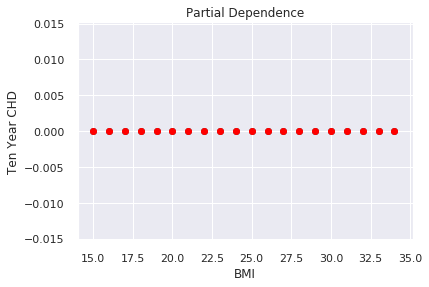

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()

examples = pd.concat([example, example2])
for bmi in range(15, 35, 1):
    examples['BMI'] = bmi
    preds = gb.predict(examples)
    for pred in preds:
        plt.scatter(bmi, pred, color='grey')
    plt.scatter(bmi, np.mean(preds), color='red')
    plt.title('Partial Dependence')
    plt.xlabel('BMI')
    plt.ylabel('Ten Year CHD')

### Partial Dependence Plots with 1 feature
PDPbox

In [0]:
# Later, when you save matplotlib images to include in blog posts or web apps,
# increase the dots per inch (double it), so the text isn't so fuzzy
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72   # makes your code look nicer

In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

In [0]:
feature='BMI'

isolated = pdp_isolate(
    model = gb,
    dataset = X_val,
    model_features = X_val.columns,
    feature = feature
)

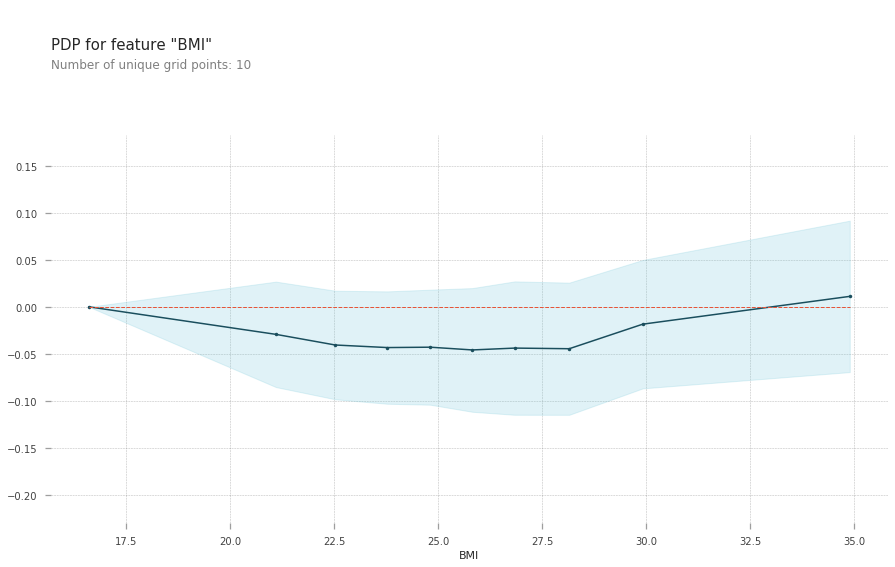

In [0]:
pdp_plot(isolated, feature_name=feature);

(14, 40)

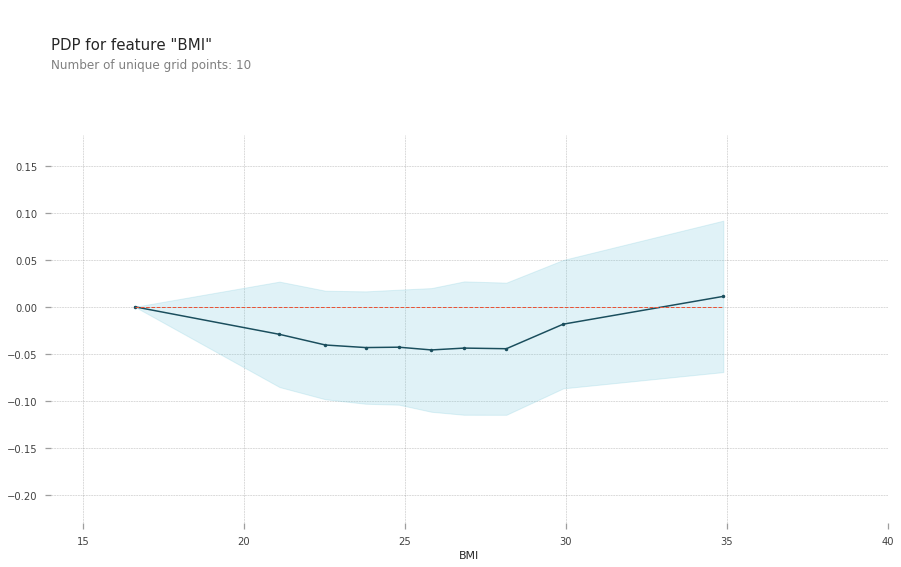

In [0]:
pdp_plot(isolated, feature_name=feature)  #limits to region we care about
plt.xlim(14, 40)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f031016b198>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f03108ed4e0>})

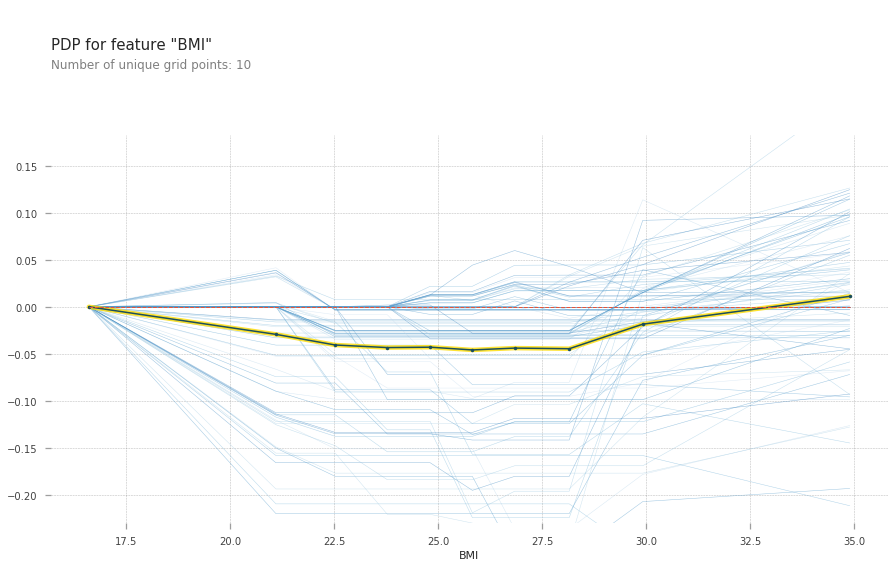

In [0]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)
#plt.xlim(0, 150)

In [0]:
isolated = pdp_isolate(
    model = gb,
    dataset = X_val,
    model_features = X_val.columns,
    feature = feature,
    num_grid_points=50
)

In [0]:
len(X_val) * 50

29450

(14, 40)

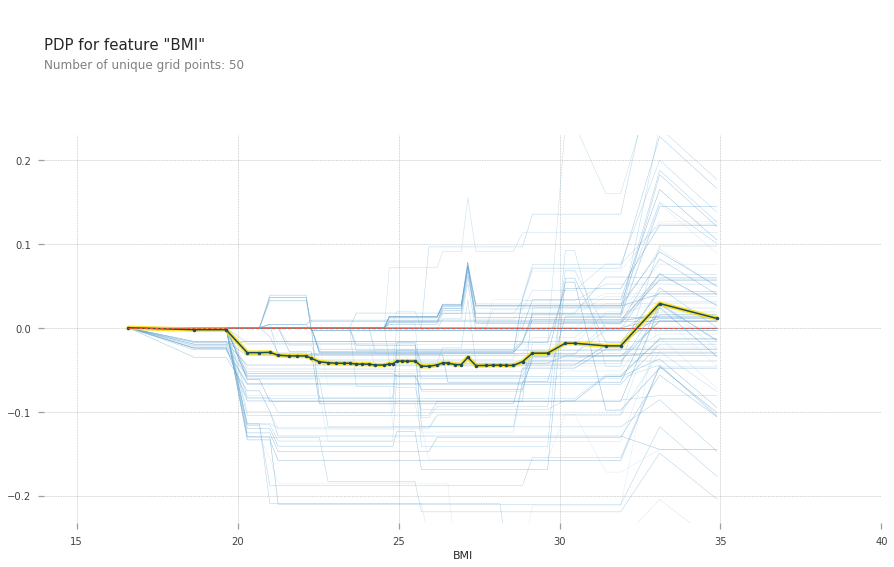

In [0]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)
plt.xlim(14, 40)

### Customize

In [0]:
dir(isolated)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_type',
 'count_data',
 'display_columns',
 'feature',
 'feature_grids',
 'feature_type',
 'hist_data',
 'ice_lines',
 'n_classes',
 'pdp',
 'percentile_info',
 'which_class']

In [0]:
grid = isolated.feature_grids
pdp = isolated.pdp
pdp

array([0.23742422, 0.23513128, 0.23513128, 0.20776333, 0.20776333,
       0.20814161, 0.2047008 , 0.20387824, 0.20387824, 0.20387824,
       0.201145  , 0.19680662, 0.19577616, 0.19515806, 0.19515806,
       0.19515806, 0.19409105, 0.19409105, 0.19409105, 0.1929852 ,
       0.1929852 , 0.19448623, 0.19431522, 0.19772139, 0.19772139,
       0.19772139, 0.19772139, 0.19165292, 0.19156411, 0.19310705,
       0.19549859, 0.19544306, 0.1935296 , 0.1935296 , 0.20229332,
       0.1923891 , 0.19247317, 0.1928543 , 0.1928543 , 0.19257607,
       0.19257607, 0.19700697, 0.20715727, 0.20715727, 0.21897088,
       0.21897088, 0.21584818, 0.21584818, 0.26631442, 0.24852534],
      dtype=float32)

In [0]:
lines = isolated.ice_lines.sample(100).T

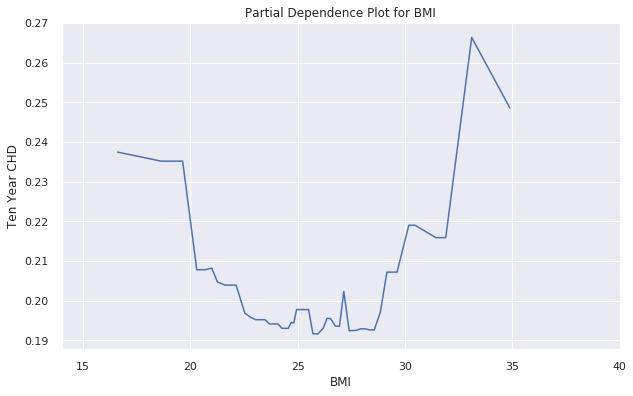

In [0]:
plt.figure(figsize=(10,6))
plt.plot(grid, pdp)
plt.xlim(14,40)
plt.ylabel('Ten Year CHD')
plt.xlabel('BMI')
plt.title('Partial Dependence Plot for BMI');

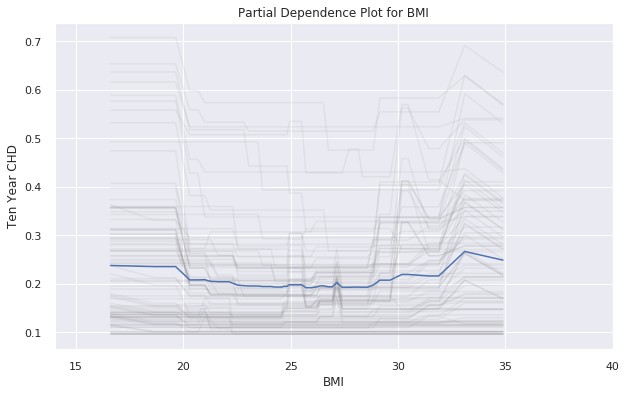

In [0]:
lines.plot(color='grey', alpha=0.1, legend=False, figsize=(10,6))
plt.plot(grid, pdp)
plt.xlim(14,40)
plt.ylabel('Ten Year CHD')
plt.xlabel('BMI')
plt.title('Partial Dependence Plot for BMI');

### Partial Dependence Plots with 2 features

Be aware of a bug in PDPBox version <=0.20:
- With the pdp_interact_plot function, plot_type='contour' gets an error, but plot_type='grid' works
- This will be fixed in the next release of PDPbox

In [0]:
X_val.columns

Index(['BMI', 'cigsPerDay', 'diaBP', 'glucose', 'heartRate', 'sysBP', 'age',
       'totChol', 'male', 'education', 'currentSmoker', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'BPMeds'],
      dtype='object')

(<Figure size 540x684 with 3 Axes>,
 {'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f030fa51e10>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f03108a4cf8>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


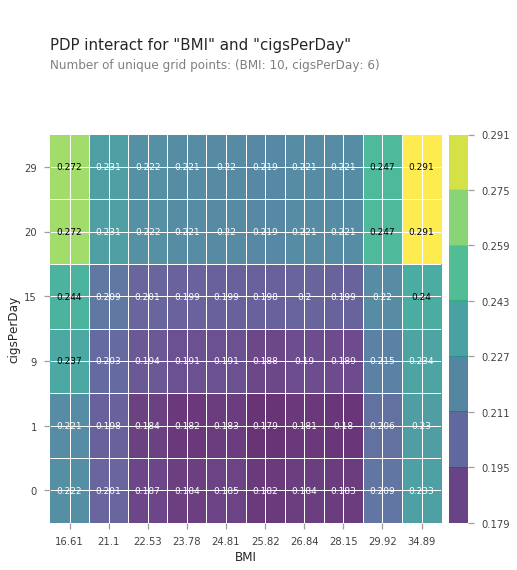

In [0]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features=['BMI', 'cigsPerDay']

interaction = pdp_interact(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features)

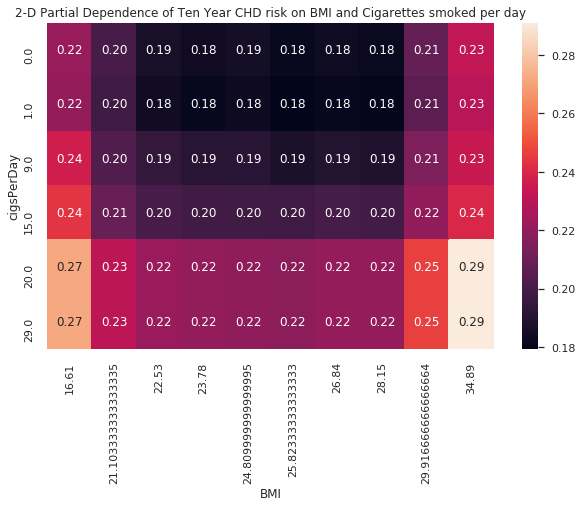

In [0]:
pdp = interaction.pdp.pivot_table(
    values='preds',
    columns=features[0],
    index=features[1]
)

plt.figure(figsize=(10,6))
sns.heatmap(pdp, annot=True, fmt='.2f')
plt.title('2-D Partial Dependence of Ten Year CHD risk on BMI and Cigarettes smoked per day');

### 3D with Plotly

In [0]:
import plotly.graph_objs as go

surface = go.Surface(
    x=pdp.columns,
    y=pdp.index,
    z=pdp.values
)

fig = go.Figure(surface)
fig.show()

In [0]:
pdp.columns

Index(['male', 'female'], dtype='object', name='sex')

In [0]:
pdp = pdp.drop(columns=[16.61, 34.89])

In [0]:
surface = go.Surface(
    x=pdp.columns,
    y=pdp.index,
    z=pdp.values
)

layout = go.Layout(
    scene= dict(
        xaxis=dict(title=features[0]),
        yaxis=dict(title=features[1]),
        zaxis=dict(title=target)
    )
)

fig = go.Figure(surface, layout)
fig.show()

### LECTURE - Partial Dependence Plots with Categorical Features
1. Recommend you use Ordinal encoder or Target Encoder, outside of pipeline, to encode your data first. (If there is a natural ordering, then take the time to encode it that way, instead of random integers.) Then use the encoded data with pdpbox
2. There's some extra work to get readable category namese on your plot, instead of integer category codes

In [0]:
# Fit a model on Titanic data
import category_encoders as ce
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

df = sns.load_dataset('titanic')
df.age = df.age.fillna(df.age.median())
df = df.drop(columns='deck')
df = df.dropna()

target = 'survived'
features = df.columns.drop(['survived', 'alive'])

X = df[features]
y = df[target]

# Use Ordinal Encoder, outside of a pipeline
encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

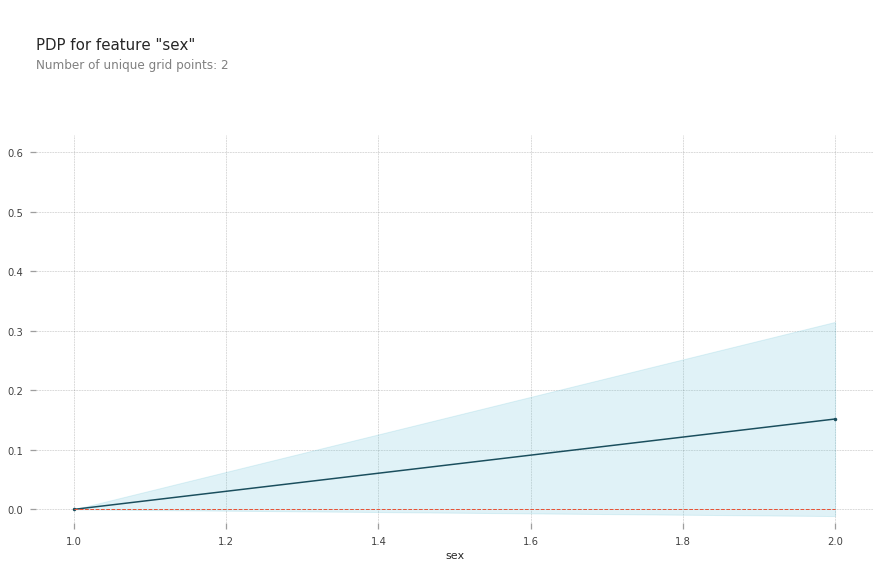

In [0]:
# Use Pdpbox
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
from pdpbox import pdp

feature = 'sex'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

In [0]:
# Look at the encoder's mappings
encoder.mapping

[{'col': 'sex', 'data_type': dtype('O'), 'mapping': male      1
  female    2
  NaN      -2
  dtype: int64},
 {'col': 'embarked', 'data_type': dtype('O'), 'mapping': S      1
  C      2
  Q      3
  NaN   -2
  dtype: int64},
 {'col': 'class',
  'data_type': CategoricalDtype(categories=['First', 'Second', 'Third'], ordered=False),
  'mapping': First     1
  Second    2
  Third     3
  NaN      -2
  dtype: int64},
 {'col': 'who', 'data_type': dtype('O'), 'mapping': man      1
  woman    2
  child    3
  NaN     -2
  dtype: int64},
 {'col': 'embark_town', 'data_type': dtype('O'), 'mapping': Southampton    1
  Cherbourg      2
  Queenstown     3
  NaN           -2
  dtype: int64}]

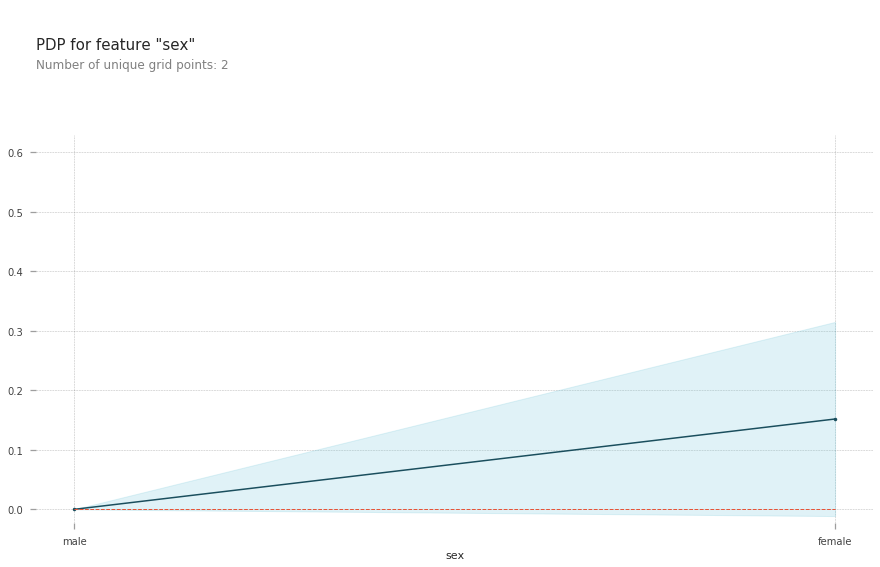

In [0]:
pdp.pdp_plot(pdp_dist, feature)

# Manually change the xticks labels
plt.xticks([1, 2], ['male', 'female']);

In [0]:
# Let's automate it
feature = 'sex'
for item in encoder.mapping:
    if item['col'] == feature:
        feature_mapping = item['mapping']
        
feature_mapping = feature_mapping[feature_mapping.index.dropna()]
category_names = feature_mapping.index.tolist()
category_codes = feature_mapping.values.tolist()

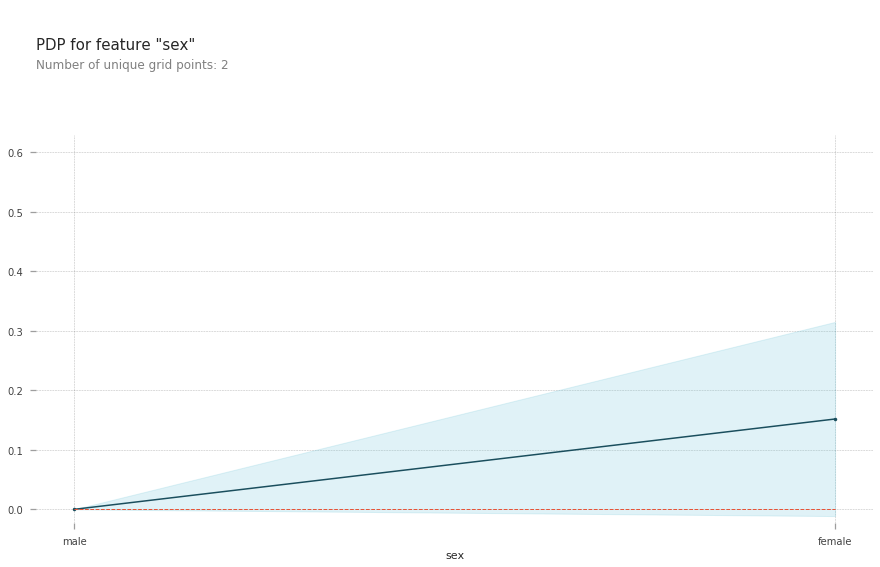

In [0]:
pdp.pdp_plot(pdp_dist, feature)

# Automatically change the xticks labels
plt.xticks(category_codes, category_names);

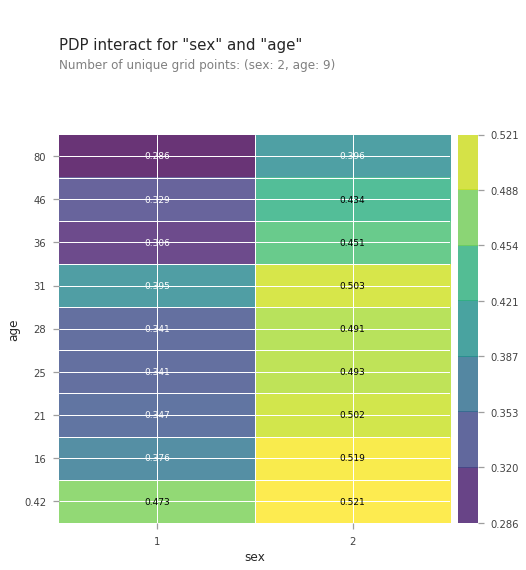

In [0]:
features = ['sex', 'age']

interaction = pdp_interact(
    model=model, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

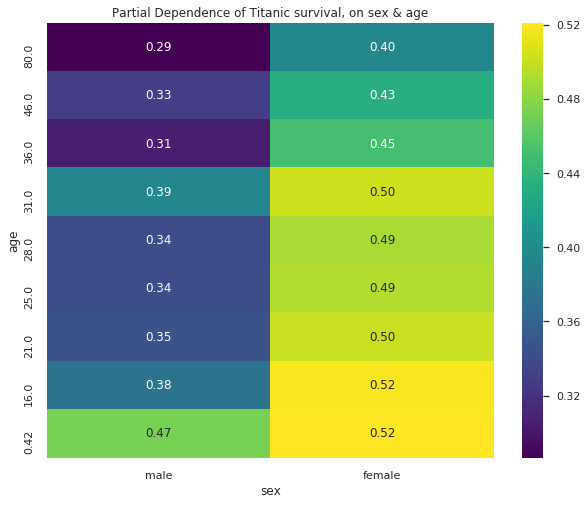

In [0]:
pdp = interaction.pdp.pivot_table(
    values='preds', 
    columns=features[0], # First feature on x axis
    index=features[1]    # Next feature on y axis
)[::-1]  # Reverse the index order so y axis is ascending

pdp = pdp.rename(columns=dict(zip(category_codes, category_names)))
plt.figure(figsize=(10,8))
sns.heatmap(pdp, annot=True, fmt='.2f', cmap='viridis')
plt.title('Partial Dependence of Titanic survival, on sex & age');